In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                  )

In [3]:
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [4]:
df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']

In [5]:
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [6]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [7]:
# 数据中有差异值

df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [9]:
# 找出"ca"列中含有“？”的所有样本
df.loc[df['ca'] == '?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
df.loc[df['thal'] == '?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [11]:
len(df.loc[(df['ca'] == "?") | (df['thal'] == "?")])

6

In [12]:
len(df)

302

In [13]:
# 找出数据中没有“？”的所有数据
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [14]:
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [15]:
len(df_no_missing)

296

In [16]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [17]:
df_no_missing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

In [18]:
# 自变量
X = df_no_missing.drop('hd', axis=1).copy()

In [19]:
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [20]:
y = df_no_missing['hd'].copy()

In [21]:
y

0      2
1      1
2      0
3      0
4      0
5      3
6      0
7      2
8      1
9      0
10     0
11     2
12     0
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     0
21     1
22     3
23     4
24     0
25     0
26     0
27     0
28     3
29     0
30     2
31     1
32     0
33     0
34     0
35     3
36     1
37     3
38     0
39     4
40     0
41     0
42     0
43     1
44     4
45     0
46     4
47     0
48     0
49     0
50     0
51     2
52     0
53     1
54     1
55     1
56     1
57     0
58     0
59     2
60     0
61     1
62     0
63     2
64     2
65     1
66     0
67     2
68     1
69     0
70     3
71     1
72     1
73     1
74     0
75     1
76     0
77     0
78     3
79     0
80     0
81     0
82     3
83     0
84     0
85     0
87     0
88     0
89     0
90     3
91     0
92     0
93     0
94     1
95     2
96     3
97     0
98     0
99     0
100    0
101    0
102    0
103    3
104    0
105    2
106    1
107    2
108    3
109    1
110    1
111    0
1

In [22]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [23]:
# X['cp'].unique()

In [24]:
# pd.get_dummies(X, columns = ['cp'])

In [25]:
# one-hot-encoding
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])

In [26]:
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,62.0,0.0,140.0,268.0,0.0,160.0,0.0,3.6,2.0,0,0,0,1,0,0,1,0,0,1,1,0,0
6,57.0,0.0,120.0,354.0,0.0,163.0,1.0,0.6,0.0,0,0,0,1,1,0,0,1,0,0,1,0,0
7,63.0,1.0,130.0,254.0,0.0,147.0,0.0,1.4,1.0,0,0,0,1,0,0,1,0,1,0,0,0,1
8,53.0,1.0,140.0,203.0,1.0,155.0,1.0,3.1,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1
9,57.0,1.0,140.0,192.0,0.0,148.0,0.0,0.4,0.0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [27]:
y.unique()

array([2, 1, 0, 3, 4])

In [28]:
y_not_zero_index = y > 0

In [29]:
y_not_zero_index

0       True
1       True
2      False
3      False
4      False
5       True
6      False
7       True
8       True
9      False
10     False
11      True
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21      True
22      True
23      True
24     False
25     False
26     False
27     False
28      True
29     False
30      True
31      True
32     False
33     False
34     False
35      True
36      True
37      True
38     False
39      True
40     False
41     False
42     False
43      True
44      True
45     False
46      True
47     False
48     False
49     False
50     False
51      True
52     False
53      True
54      True
55      True
56      True
57     False
58     False
59      True
60     False
61      True
62     False
63      True
64      True
65      True
66     False
67      True
68      True
69     False
70      True
71      True
72      True
73      True
74     False
75      True
76     False

In [30]:
# 将大于0的标签都设置为1
y[y_not_zero_index] = 1

In [31]:
y

0      1
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      1
9      0
10     0
11     1
12     0
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     0
21     1
22     1
23     1
24     0
25     0
26     0
27     0
28     1
29     0
30     1
31     1
32     0
33     0
34     0
35     1
36     1
37     1
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     1
47     0
48     0
49     0
50     0
51     1
52     0
53     1
54     1
55     1
56     1
57     0
58     0
59     1
60     0
61     1
62     0
63     1
64     1
65     1
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     1
74     0
75     1
76     0
77     0
78     1
79     0
80     0
81     0
82     1
83     0
84     0
85     0
87     0
88     0
89     0
90     1
91     0
92     0
93     0
94     1
95     1
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    1
104    0
105    1
106    1
107    1
108    1
109    1
110    1
111    0
1

In [32]:
y.unique()

array([1, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [34]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

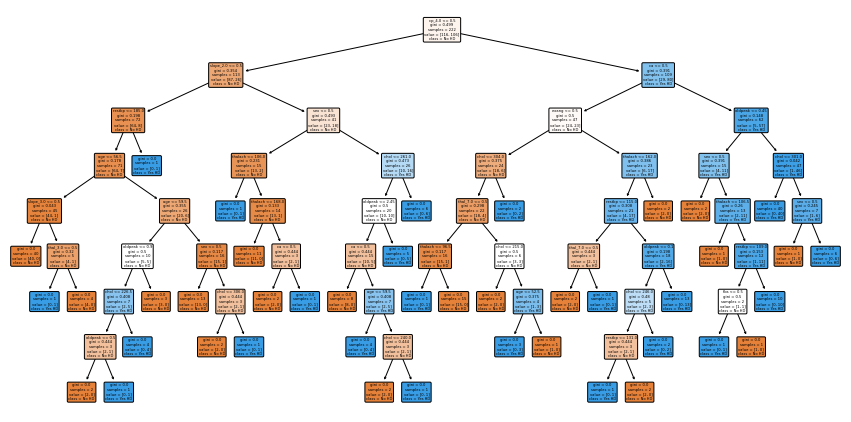

In [35]:
# 创建一个图形实例
plt.figure(figsize=(15,7.5))

# 绘决策树
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names = ["No HD", "Yes HD"],
         feature_names=X_encoded.columns);

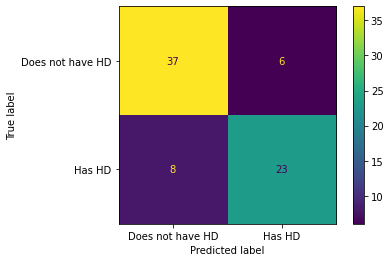

In [36]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [37]:
# 使用成本复杂性剪枝(CCP）https://www.cnblogs.com/panchuangai/p/13445819.html
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

In [38]:
# ccp_alpha值越大，剪枝的节点数就越多
path

{'ccp_alphas': array([0.        , 0.00412913, 0.00418275, 0.00422297, 0.0044044 ,
        0.00440866, 0.00533867, 0.00600601, 0.00600601, 0.00600601,
        0.00675676, 0.00686401, 0.00686401, 0.00698776, 0.00715001,
        0.00725011, 0.00798526, 0.00848482, 0.00867452, 0.01078097,
        0.01105651, 0.01419001, 0.01991335, 0.02530655, 0.0253144 ,
        0.04453107, 0.12689446]),
 'impurities': array([0.        , 0.00825826, 0.01662377, 0.02506971, 0.03387852,
        0.04269585, 0.05871187, 0.06471787, 0.07072388, 0.07672988,
        0.0902434 , 0.0971074 , 0.10397141, 0.11095917, 0.11810917,
        0.12535928, 0.1413298 , 0.17526909, 0.19261813, 0.2033991 ,
        0.21445561, 0.25702565, 0.276939  , 0.30224555, 0.32755995,
        0.37209102, 0.49898547])}

In [39]:
ccp_alphas = path.ccp_alphas

In [40]:
ccp_alphas

array([0.        , 0.00412913, 0.00418275, 0.00422297, 0.0044044 ,
       0.00440866, 0.00533867, 0.00600601, 0.00600601, 0.00600601,
       0.00675676, 0.00686401, 0.00686401, 0.00698776, 0.00715001,
       0.00725011, 0.00798526, 0.00848482, 0.00867452, 0.01078097,
       0.01105651, 0.01419001, 0.01991335, 0.02530655, 0.0253144 ,
       0.04453107, 0.12689446])

In [41]:
ccp_alphas = ccp_alphas[:-1]

In [42]:
ccp_alphas

array([0.        , 0.00412913, 0.00418275, 0.00422297, 0.0044044 ,
       0.00440866, 0.00533867, 0.00600601, 0.00600601, 0.00600601,
       0.00675676, 0.00686401, 0.00686401, 0.00698776, 0.00715001,
       0.00725011, 0.00798526, 0.00848482, 0.00867452, 0.01078097,
       0.01105651, 0.01419001, 0.01991335, 0.02530655, 0.0253144 ,
       0.04453107])

In [43]:
clf_dts = []

# 依次遍历不同的ccp_alpha训练模型
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [44]:
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00412912912912913, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004182754182754184, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004222972972972973, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004404404404404408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0044086639831320724, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005338672005338672, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006864006864006865, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006864006864006865, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006987756987756987, random_state=0),
 DecisionT

In [45]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

In [46]:
train_scores

[1.0,
 0.9954954954954955,
 0.990990990990991,
 0.9864864864864865,
 0.9819819819819819,
 0.9774774774774775,
 0.9684684684684685,
 0.954954954954955,
 0.954954954954955,
 0.954954954954955,
 0.9414414414414415,
 0.9324324324324325,
 0.9324324324324325,
 0.9279279279279279,
 0.9234234234234234,
 0.918918918918919,
 0.9144144144144144,
 0.8963963963963963,
 0.8873873873873874,
 0.8783783783783784,
 0.8693693693693694,
 0.8333333333333334,
 0.8063063063063063,
 0.8063063063063063,
 0.7567567567567568,
 0.7522522522522522]

In [47]:
test_scores

[0.8378378378378378,
 0.8378378378378378,
 0.8378378378378378,
 0.8378378378378378,
 0.8513513513513513,
 0.8513513513513513,
 0.8513513513513513,
 0.8513513513513513,
 0.8513513513513513,
 0.8513513513513513,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.8378378378378378,
 0.8378378378378378,
 0.8378378378378378,
 0.8513513513513513,
 0.8108108108108109,
 0.8108108108108109,
 0.8108108108108109,
 0.7837837837837838,
 0.7567567567567568]

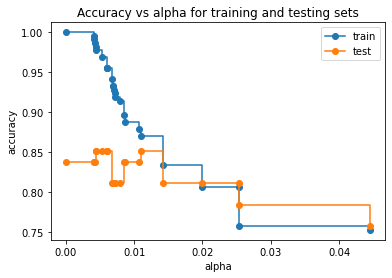

In [48]:
fig, ax = plt.subplots()  # 等价于fig, ax = plt.subplots(11)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o',label="test", drawstyle="steps-post")
ax.legend()
plt.show()

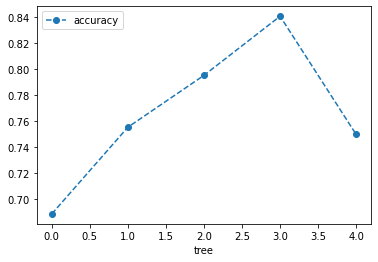

In [49]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# 5折交叉验证
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})

# 画图
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [50]:
import numpy as np

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [51]:
alpha_loop_values

[[0.0, 0.6805050505050505, 0.04348434988393042],
 [0.00412912912912913, 0.6805050505050505, 0.04348434988393042],
 [0.004182754182754184, 0.6805050505050505, 0.04348434988393042],
 [0.004222972972972973, 0.6805050505050505, 0.04348434988393042],
 [0.004404404404404408, 0.6805050505050505, 0.04348434988393042],
 [0.0044086639831320724, 0.6805050505050505, 0.04348434988393042],
 [0.005338672005338672, 0.6805050505050504, 0.05010711921046629],
 [0.006006006006006006, 0.676060606060606, 0.052084005199217166],
 [0.006006006006006006, 0.676060606060606, 0.052084005199217166],
 [0.006006006006006006, 0.676060606060606, 0.052084005199217166],
 [0.006756756756756757, 0.6895959595959595, 0.05164926096814211],
 [0.006864006864006865, 0.6895959595959595, 0.05164926096814211],
 [0.006864006864006865, 0.6895959595959595, 0.05164926096814211],
 [0.006987756987756987, 0.6895959595959595, 0.05164926096814211],
 [0.007150007150007156, 0.6895959595959595, 0.05164926096814211],
 [0.007250107250107251, 0.6

In [52]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

In [53]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.680505,0.043484
1,0.004129,0.680505,0.043484
2,0.004183,0.680505,0.043484
3,0.004223,0.680505,0.043484
4,0.004404,0.680505,0.043484
5,0.004409,0.680505,0.043484
6,0.005339,0.680505,0.050107
7,0.006006,0.676061,0.052084
8,0.006006,0.676061,0.052084
9,0.006006,0.676061,0.052084


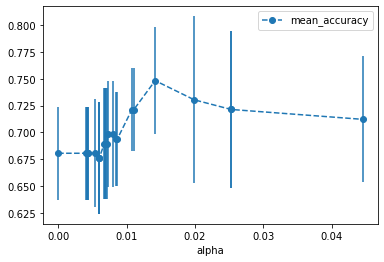

In [54]:
alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [55]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015)]

,alpha,mean_accuracy,std
21,0.01419,0.748182,0.049741


In [56]:
ideal_cpp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015)]['alpha']

In [57]:
ideal_cpp_alpha

21    0.01419
Name: alpha, dtype: float64

In [58]:
# 用float去索引
ideal_cpp_alpha = float(ideal_cpp_alpha)

In [59]:
ideal_cpp_alpha

0.014190014190014191

In [60]:
# 传入理想的cpp_alpha值
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_cpp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

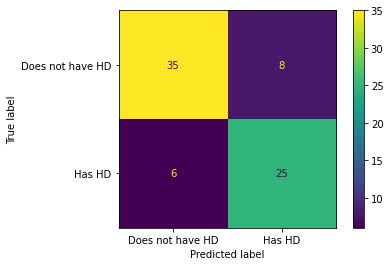

In [61]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels=['Does not have HD', 'Has HD'])

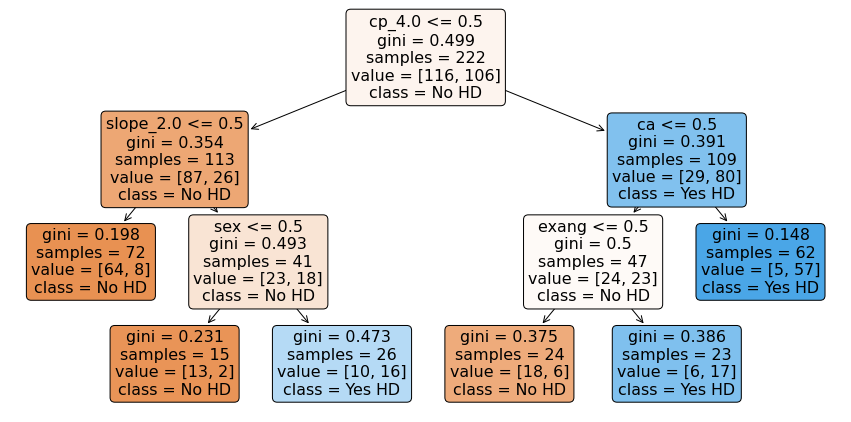

In [62]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names=['No HD','Yes HD'],
         feature_names = X_encoded.columns);